# Exploring NYC Traffic Accident Data

New York City is one of the busiest cities in the world. With a population of over 8 million people, we can expect to see some interesting trends if we were to observe some data. 

NYC Open Data offers a large list of data reports. I decided to download the "NYPD_Motor_Vehicle_Collisions" data set, which is 230 Mb and can be found online at: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data. This data set contains information regarding every traffic accident entered into the NYPD system.

I will first try to make a few graphics that can describe and let us visualize the data set. Next, I will turn my focus to visualizing Taxi Cab data, and finally, run a regression to determine whether Taxi drivers are safer than ordinary drivers.

In [27]:
#Import the packages we will be using

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
data = pd.read_csv("/Users/Eli/Desktop/NYPD_Motor_Vehicle_Collisions.csv")

/Users/eli/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
data.dtypes    #Show the data types of each column

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [30]:
data.head() #Shows us what the data frame looks like

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/16/2017,0:00,BRONX,10472,40.831287,-73.881730,"(40.831287, -73.88173)",EAST 172 STREET,BRONX RIVER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3651861,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN
1,04/16/2017,0:00,BROOKLYN,11201,40.686726,-73.990470,"(40.686726, -73.99047)",BERGEN STREET,SMITH STREET,NaN,...,Unspecified,NaN,NaN,NaN,3651519,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
2,04/16/2017,0:00,BROOKLYN,11201,40.702560,-73.991140,"(40.70256, -73.99114)",NaN,NaN,57 FRONT STREET,...,Unspecified,NaN,NaN,NaN,3651522,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,04/16/2017,0:00,QUEENS,11429,40.712590,-73.733154,"(40.71259, -73.733154)",NaN,NaN,220-20 HEMPSTEAD AVENUE,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3651540,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
4,04/16/2017,0:00,NaN,NaN,40.701440,-73.984770,"(40.70144, -73.98477)",BRIDGE STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3651521,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


As we can see, there is a lot of information on this data set. Some of the relevant columns of information we can use include: Borough, Street Name, Longitude, Latitude, Injured, Killed, Date and Time.

Vehicle Type Code 1 - 5 tells us what types of vehicle were involved in one observation.

For example, if one car and one taxi were involved, then "Vehicle Type Code 1" = Passenger Vehicle, and "Vehicle Type Code 2" = Taxi.

In [31]:
data['BOROUGH'] = data['BOROUGH'].astype('category')

The first thing I want to know about the data set is the distribution of car accidents by borough. To easily visualize these results, we can make a simple pie chart:

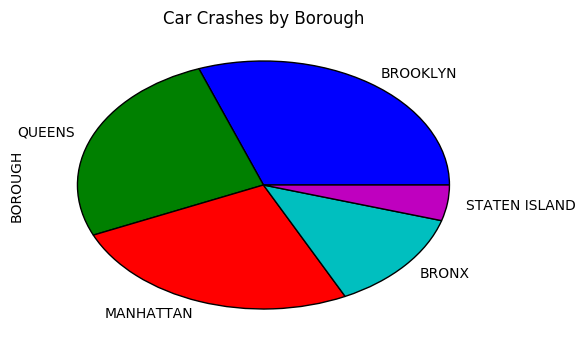

In [32]:
# Graph total number of accidents by borough
data['BOROUGH'].value_counts().plot(kind = "pie", title = "Car Crashes by Borough", ) 

Next, to give you an idea of how large the data set is and just how ubiquitous accidents are, I was able to reconstruct a map of NYC just by plotting the Longitude and Latitude of each accident on a scatter plot.

To separate the buroughs by color, I had to break the data frame down by boroughs, so they can each be graphed separatley.

There is a similar idea of a scatter plot map on this blog post: http://www.danielforsyth.me/mapping-nyc-taxi-data/ 

I found this while researching my data set and thought that I should try to make my own version. Here I used matplotlib.pyplot to overlay the graphs of each borough on to one scatter plot.

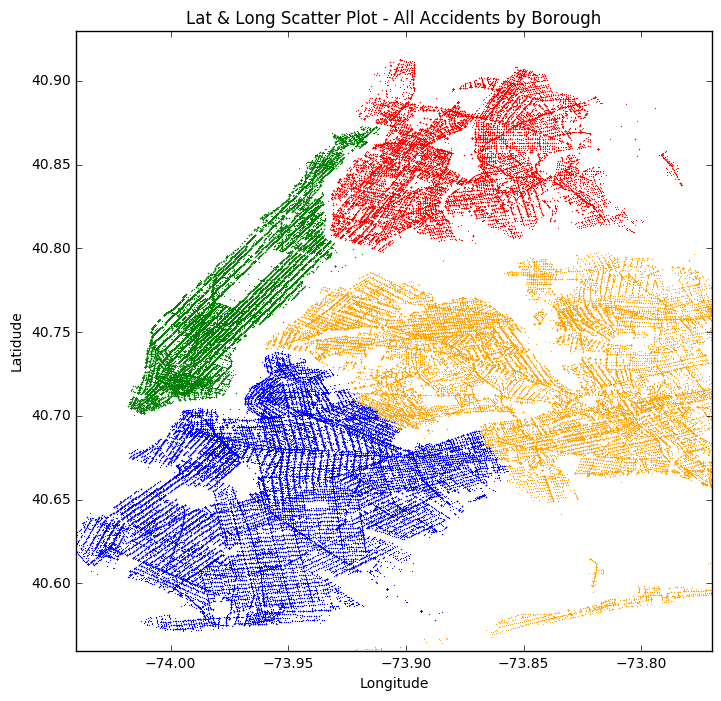

In [33]:
# Create 4 new dataframes based on their boroughs  - Staten Island is too far
bronx = data[data['BOROUGH'] == 'BRONX']              
manhattan = data[data['BOROUGH'] == 'MANHATTAN']             
brooklyn = data[data['BOROUGH'] == 'BROOKLYN']
queens = data[data['BOROUGH'] == 'QUEENS']


# Graph the scatter plot for the longitude and latitude for every accident in each burough on 1 graph
# The idea for the scatter plot map: http://www.danielforsyth.me/mapping-nyc-taxi-data/
plt.figure(figsize=(8.2,8))                 
plt.plot(bronx['LONGITUDE'],bronx['LATITUDE'],'.',color = 'red',ms= .63)      
plt.plot(manhattan['LONGITUDE'],manhattan['LATITUDE'],'.',color = 'green',ms= .63)
plt.plot(brooklyn['LONGITUDE'],brooklyn['LATITUDE'],'.',color = 'blue',ms= .63)
plt.plot(queens['LONGITUDE'],queens['LATITUDE'],'.',color = 'orange',ms= .63)

plt.xlabel('Longitude')
plt.ylabel('Latidude')
plt.axis([-74.04,-73.77,40.56,40.93,])  
plt.title('Lat & Long Scatter Plot - All Accidents by Borough')

# Coordinates for axis from http://boundingbox.klokantech.com/

Another interesting graph to look at would be the streets with the most car accidents. There are thousands of streets so I will look at only the top 15.

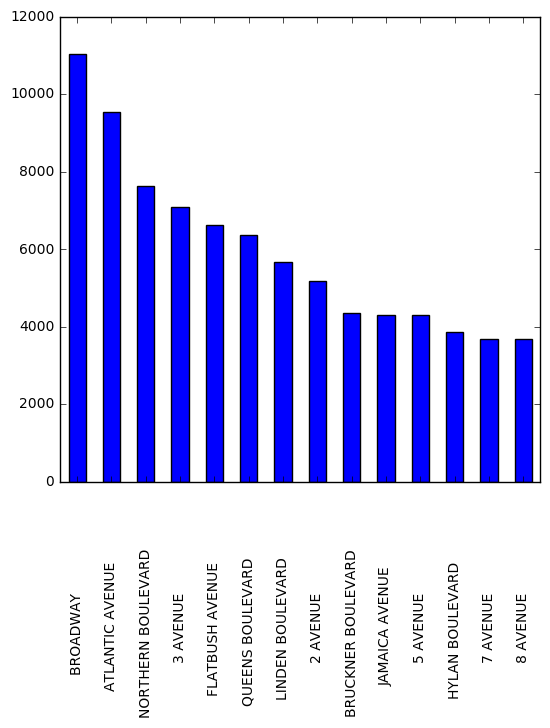

In [34]:
# Count the number of times each street appears, show the top 15, plot the results.
# Slice used to remove the top result, becuase it was a blank street name (missing information)

plt.figure(figsize=(6.2,6))                
data['ON STREET NAME'].value_counts().head(15)[1:].plot(kind = 'bar')                                       

Here I will try to take a closer look at the types of vehicles involved in an accident. I will first show the graph for the whole data set, and then I will try to compare that with the data from only Manhattan.

We can expect to see a different distribution of vehicles for Manhattan because it has a very unique demographic. One thing to notice in the following bar charts is the level of Taxi accident in Manhattan relative to the rest of the data set. This shouldn't be a surprise.

*Note - this only graphs single vehicle collisions.

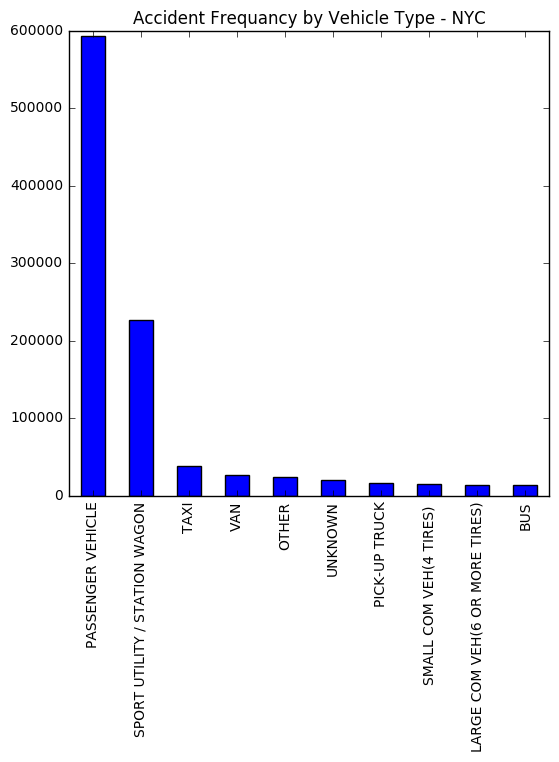

In [35]:
plt.figure(figsize=(6.2,6))                
data["VEHICLE TYPE CODE 1"].value_counts().head(10).plot(kind = "bar", title = "Accident Frequancy by Vehicle Type - NYC")

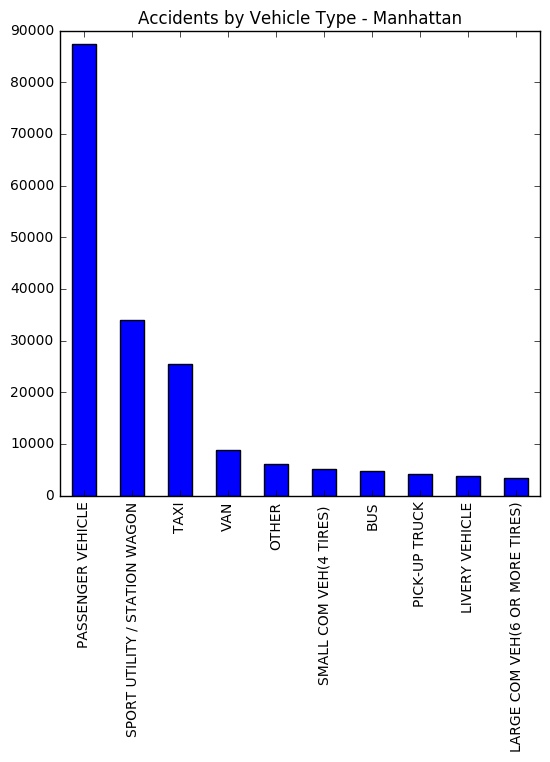

In [36]:
plt.figure(figsize=(6.2,6))
manhattan["VEHICLE TYPE CODE 1"].value_counts().head(10).plot(kind = "bar", title = "Accidents by Vehicle Type - Manhattan")

Although we can safely assume there are more taxis in Manhattan, I wanted to be able to create a visualization of where taxis get into accidents. 

To do this, I will make a scatter plot of the lat/long of taxi accidents in red, and the lat/long of passenger vehicle accidents in black. This is very similar to what I did earlier.

Due to the organization of the data set, Vehicle Types can be found in up to 5 different columns. We have to create 2 new data frames where one captures every time "taxi" is mentioned in any of the five columns, and another dataframe for every time "passenger vehicle" is mentioned. I used the df.append() method to aggregate the relevant data into 2 different data frames.

In [37]:
#Create data frame only for accidents involving passenger vehicle
passenger = data[data['VEHICLE TYPE CODE 1'] == 'PASSENGER VEHICLE']
passenger = passenger.append(data[data['VEHICLE TYPE CODE 2'] == 'PASSENGER VEHICLE'])
passenger = passenger.append(data[data['VEHICLE TYPE CODE 3'] == 'PASSENGER VEHICLE'])
passenger = passenger.append(data[data['VEHICLE TYPE CODE 4'] == 'PASSENGER VEHICLE'])
passenger = passenger.append(data[data['VEHICLE TYPE CODE 5'] == 'PASSENGER VEHICLE'])


#Create data frame only for accidents involving taxis
taxis = data[data['VEHICLE TYPE CODE 1'] == 'TAXI']
taxis = taxis.append(data[data['VEHICLE TYPE CODE 2'] == 'TAXI'])
taxis = taxis.append(data[data['VEHICLE TYPE CODE 3'] == 'TAXI'])
taxis = taxis.append(data[data['VEHICLE TYPE CODE 4'] == 'TAXI'])
taxis = taxis.append(data[data['VEHICLE TYPE CODE 5'] == 'TAXI'])

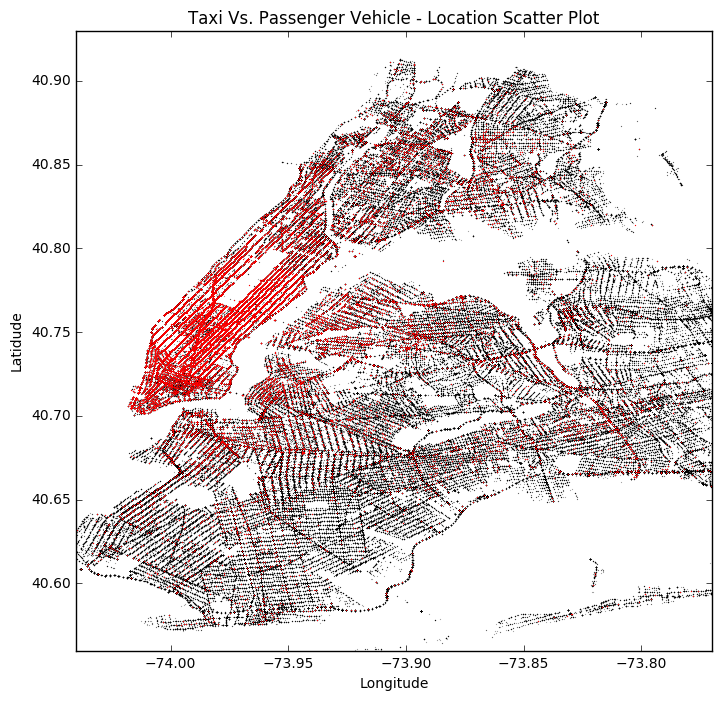

In [38]:
#Graph the lat and long of passengers and of taxis
plt.figure(figsize=(8.2,8))
plt.plot(passenger['LONGITUDE'],passenger['LATITUDE'],'k.',ms= .8,alpha=.3)
plt.plot(taxis['LONGITUDE'],taxis['LATITUDE'],'r.',ms= .8)
plt.axis([-74.04,-73.77,40.56,40.93,]) 

plt.xlabel('Longitude')
plt.ylabel('Latidude')
plt.title('Taxi Vs. Passenger Vehicle - Location Scatter Plot')

As you can see, there is a large concentration of taxi accidents in and around the Manhattan area compared to passenger vehicles. This makes a lot of sense; there are many more taxis driving in Manhattan than anywhere else in NYC. There also seems to be a concentration of accidents in the Financial District. Be careful down there.

Another interesting chart for single-vehicle taxi incidents.

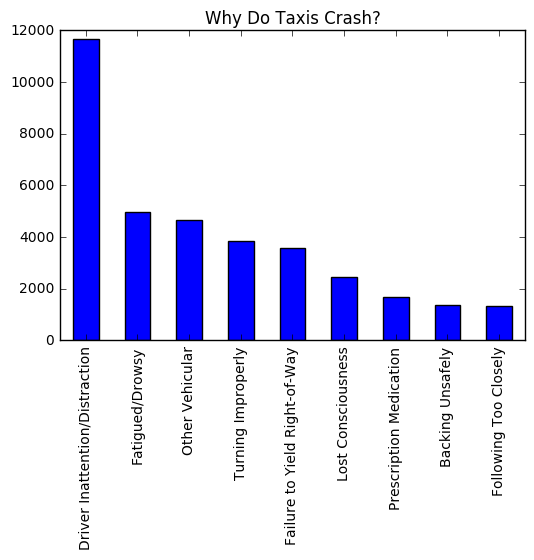

In [39]:
taxis['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)[1:].plot(kind = 'bar', title = 'Why Do Taxis Crash?')

# Regression Preperation

I want to be able to run a regression of the total casualties on the time of day, season, and involvement of a taxi driver. In order to do this I need to create 3 new columns in my data frame: time of day, season, and taxi involvement.

Instead of using the hour for the "Time of Day" column, I will group certain hours together into Morning, Afternoon, Night, and Late Night. This way we will have a regression of 4 variables instead of 24.

Instead of using the the Month value for the "Season" column I will group the appropriate months into Winter, Spring, Summer, and Fall. Similar concept as above.

For the "Taxi Involvement" column, I will record whether a Taxi was involved as either True or False for every accident.

But before we can make these groups, we need to collect "Hour", "Month", and "True/False" for every accident.

In order to do this, I will define 3 functions that will create a new column with the information we need.

In [40]:
# This function will return the "hour" value for any given row
def Hour(row):   
    time = str(row['TIME'])
    return time[0:time.index(":")]

# .apply method applies the above function to every row and puts the result in a new column called "HOUR"
data['HOUR'] = data.apply(Hour, axis = 1)

In [41]:
# This function will return "True" for a row if a Taxi is involved and "False" if not.
def taxiInvolved(row):
    if row['VEHICLE TYPE CODE 1'] == 'TAXI' or row['VEHICLE TYPE CODE 2'] == 'TAXI' or row['VEHICLE TYPE CODE 3'] == 'TAXI' or row['VEHICLE TYPE CODE 4'] == 'TAXI' or row['VEHICLE TYPE CODE 5'] == 'TAXI':
        return True
    else:
        return False

#  Applies the above function to every row and puts the result in a new column called "Taxi_Involvement"
data['Taxi_Involvement'] = data.apply(taxiInvolved, axis = 1)

In [42]:
# This function will return the "Month" value for any given row - in other words 1 - 12.
def Month(row):
    date = str(row['DATE'])
    return date[0:date.index("/")]

# Applies the above function to every row and puts the result in a new column called "MONTH"
data['MONTH'] = data.apply(Month, axis =1)

In [43]:
# I want to include injuries and deaths in my regression
data['TOTAL_CASUALTIES'] = data['NUMBER OF PERSONS INJURED'] + data['NUMBER OF PERSONS KILLED']

The data frame now looks like this:

In [44]:
data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,Taxi_Involvement,MONTH,TOTAL_CASUALTIES
0,04/16/2017,0:00,BRONX,10472,40.831287,-73.881730,"(40.831287, -73.88173)",EAST 172 STREET,BRONX RIVER AVENUE,NaN,...,3651861,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,0,False,04,0
1,04/16/2017,0:00,BROOKLYN,11201,40.686726,-73.990470,"(40.686726, -73.99047)",BERGEN STREET,SMITH STREET,NaN,...,3651519,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN,0,True,04,0
2,04/16/2017,0:00,BROOKLYN,11201,40.702560,-73.991140,"(40.70256, -73.99114)",NaN,NaN,57 FRONT STREET,...,3651522,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,False,04,0
3,04/16/2017,0:00,QUEENS,11429,40.712590,-73.733154,"(40.71259, -73.733154)",NaN,NaN,220-20 HEMPSTEAD AVENUE,...,3651540,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,False,04,0
4,04/16/2017,0:00,NaN,NaN,40.701440,-73.984770,"(40.70144, -73.98477)",BRIDGE STREET,NaN,NaN,...,3651521,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,False,04,0


4 New columns have been created: "Total Casualties", "With Taxi", "Hour", and "Month". Now I can use the "Hour" and "Month" columns that I made to create a "Season" and "Time of Day" column that will actually be used in the regression.

"Total Casualties" is the dependent variable. 

The "With Taxi" column can be used as-is for a independent variable. 

The "Season" and "Time of Day" columns will be the other two independant variables. 

The aim of the regression is to figure out which factors might contribute positively and negatively to the number of casualties in a given accident.

In [45]:
# This function will return the appropriate season for any given row.
def Season(row):
    winter = [12,1,2]
    spring = [3,4,5]
    summer = [6,7,8]
    fall = [9,10,11]
    
    if int(row['MONTH']) in winter: return "winter"
    if int(row['MONTH']) in spring: return "spring"
    if int(row['MONTH']) in summer: return "summer"
    if int(row['MONTH']) in fall: return "fall"

# Applies the above function to every row and puts the result in a new column called "SEASON"
data['SEASON'] = data.apply(Season, axis = 1)

In [46]:
# This function will return the appropriate "time of day" for any given row
def TimeOfDay(row):
    morning = [7,8,9,10,11,12]
    afternoon = [13,14,15,16,17,18]
    night = [19,20,21,22,23,0]
    late_night = [1,2,3,4,5,6]
    
    if int(row['HOUR']) in morning: return "morning"
    if int(row['HOUR']) in afternoon: return "afternoon"
    if int(row['HOUR']) in night: return "night"
    if int(row['HOUR']) in late_night: return "late_night"

# Applies the above function to every row and puts the result in a new column called "TIME_OF_DAY"   
data['TIME_OF_DAY'] = data.apply(TimeOfDay, axis = 1)

In [47]:
#imports the statistics package that will be used to run the regression

import statsmodels.formula.api as sm
lm = sm.ols('TOTAL_CASUALTIES ~ TIME_OF_DAY + SEASON + Taxi_Involvement', data = data).fit()
lm.summary()

#Documentation found on this Stack Exchange: http://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TOTAL_CASUALTIES   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     599.9
Date:                Fri, 12 May 2017   Prob (F-statistic):               0.00
Time:                        15:56:23   Log-Likelihood:            -1.0127e+06
No. Observations:             1016502   AIC:                         2.026e+06
Df Residuals:                 1016494   BIC:                         2.026e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.2522      0.002    167.661      0.000         0.249     0.255
TIME_OF_DAY[T.late_night]     0.0927      0.002     37.466      0.000         0.088     0.098
TIME_OF_DAY[T.morning]       -0.0238      0.002    -15.155      0.000        -0.027    -0.021
TIME_OF_DAY[T.night]          0.0639      0.002     36.701      0.000         0.061     0.067
SEASON[T.spring]             -0.0111      0.002     -6.053      0.000        -0.015    -0.008
SEASON[T.summer]              0.0055      0.002      3.019      0.003         0.002     0.009
SEASON[T.winter]             -0.0272      0.002    -14.966      0.000        -0.031    -0.024
Taxi_Involvement[T.True]     -0.0403      0.003    -15.034      0.000        -0.046    -0.035
==============================================================================
Omnibus:                  1056180.030   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        180567270.924
Skew:                           4.865   Prob(JB):                         0.00
Kurtosis:                      67.564   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

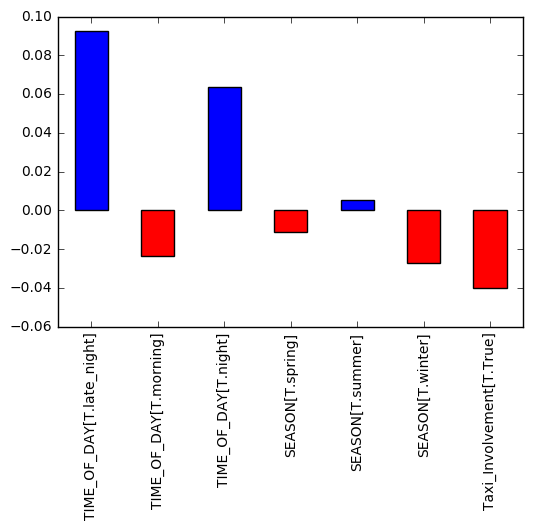

In [48]:
lm.params[1:].plot(kind = 'bar', color = ['blue', 'red', 'blue', 'red','blue','red', 'red'])

# Interpretting Regression Results

The regression shows us that certain factors do have statistically significant effects on the target variable - the total casualties in a given accident. The p values displayed in the summary show that every coefficient is statistically significant well beyond p < 0.05. 

The coefficinets show us the degree to which the predictor variables influence our target variable, as well as the direction (positive or negative impact). As you can see from the color-coded bar graph above, the strongest factors contributing towards a higher rate of casualties in the data are the fact that it took place at night or during the late night. This seems intuitively logical, as low visibility and higher rates of drunk driving might play a role. It also shows that the regression results are resonable. 

Another interesting conclusion of the regression is that the involvement of a taxi in an accident seems to be the strongest factor among the predictor variables in producing a lower number of casualties in a given accident. Interpretting this result is not as straight forward. Are taxi driver inherently better drivers because of their occupation? Or do they just tend to have less people in the car, causing low number of casualties? Further analysis is required to determine whether or not Taxi drivers are better drivers; but for now it seems that if your're going to crash, you should crash into a taxi.